<a href="https://colab.research.google.com/github/kalz2q/mycolabnotebooks/blob/master/matplotlibtutorials.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# メモ

matplotlib tutorials を利用した matplotlib の学習。 実験学習。 若干かけあしかも。

# 環境 スタイル
matplotlib.style.use で スタイルが選べる。


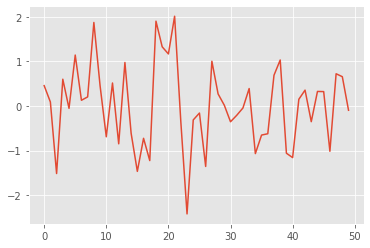

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('ggplot') # ここでスタイル名を指定する
data = np.random.randn(50)
plt.plot(data) # x,y形式でなくてもplotできる
plt.show()

In [ ]:
# print(plt.style.available) とすればstyleのリストが得られる

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


In [ ]:
# styleによってなにをしているかが違うので事前に使ったstyleの影響を受ける。使い物にならないのではないか
# それぞれのstyleの内容を知りたい。まあいいか
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('dark_background')
plt.style.use('fivethirtyeight')
plt.figure(figsize=(4,4),facecolor='pink')
plt.style.use('Solarize_Light2')
plt.style.use('classic')
plt.style.use('seaborn')
plt.plot(np.sin(np.linspace(0, 2 * np.pi)), 'r-o')
plt.show()

plt.plot の中で 'r-o' とか指定できる。

plt.rcParamsで細かく指定できる。

rcParamsで指定したもののセットが style なのだろう。
&nbsp;  
&nbsp;  
plt.figure(figsize=(4,4),facecolor='pink')

とかで指定すると、rcParamsにかかわらず優先されるので、plt.plotを使う限りではrcParamsをあまり細かく学ぶ必要はないのかもしれない。 古い仕様なのかもしれない。
&nbsp;  
&nbsp;  
sympyのplotを使う場合、rcParamsの環境だけを使うようなので、知っておく必要はある。



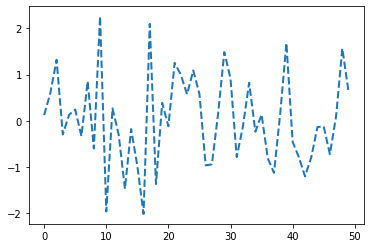

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
data = np.random.randn(50)
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['lines.linestyle'] = '--'
plt.plot(data)
plt.show()
# from sympy import *
# x =symbols('x')
# plot(x**2,(x,-0.5,0.5))

グラフの色は勝手に選ばれるのを変えるには axes.prop_cycle を変えるとあるが、次のプログラムはエラーになった。
&nbsp;  
&nbsp;  
&nbsp;  
colorについて調べる

cyclerについて調べる



In [ ]:
# import matplotlib as mpl
# mpl.rcParams['axes.prop_cycle'] = cycler(color=['r', 'g', 'b', 'y']
# plt.plot(data)  # first color is red
# plt.show()

グラフのスタイルを設定するのに `style.use`, `rcParams` 以外に `rc` でキーワード引数をつかってまとめて設定する方法がある。


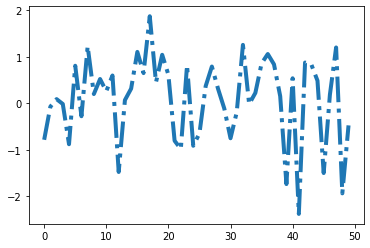

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
data = np.random.randn(50)
# plt.rcParams['lines.linewidth'] = 8
plt.rc('lines', linewidth=4, linestyle='-.')
plt.plot(data)

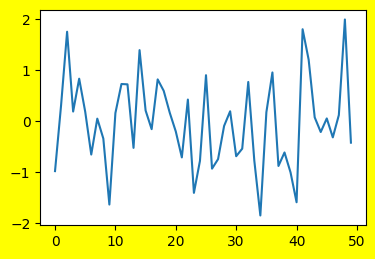

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
data = np.random.randn(50)
plt.rcdefaults() # defaultはcolabのdefaultではない
plt.rcParams['figure.figsize']=[4.2,2.8] # 反映する
# plt.figure(figsize=(4,4),facecolor='pink') # 反映する。優先される
plt.rcParams['figure.facecolor']='yellow' # 反映するが、弱い
plt.rcParams['lines.color']='black' # 反映しない
# plt.plot(data, 'k--') # 反映する
plt.plot(data)
plt.show()

In [ ]:
# rcParamsの内容を知る方法
import matplotlib.pyplot as plt
# print(plt.rcParams) # lines.color:C0 , figure.figsize: [6.4, 4.8], C0 は cycler の 0番目の意味か?

`matplotlib.rcdefaults`  Matplotlib のデフォルトに戻る。

colab のデフォルトはランタイムを中断すればわかる => 違いを比較してみよう。 => 違いはほとんどなかった
&nbsp;  
&nbsp;  

rcParams の設定の validation については `matplotlib.rcsetup` にかかれているとか。 

=> 例 >>> c = cycler(color=['red', 'green', 'blue']) とか。 わからない。

&nbsp;  
&nbsp;  

matplotlibの設定は `matplotlibrc` というファイルにあります、とか。


In [ ]:
import matplotlib.pyplot as plt
# print(plt.rcParams)

# Usage Guide


# いまここ user guide 


matplotlibはfigureというエリアに設定されたaxという座標にデータを描画する。

axを持ったfigureを作る最も簡単な方法は

fig, ax = plt.subplots()

である。


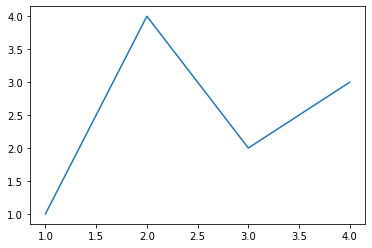

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()  # 1つの座標axを持つfigureを作る
ax.plot([1, 2, 3, 4], [1, 4, 2, 3])  # axにplotする

MATLABを含め他のグラフ作成ライブラリーは座標を明示的に作る必要がない。

matplotlibでも、axを作る手間を省いて、次のようにすると現在(current)の座標にグラフを書くことができる。

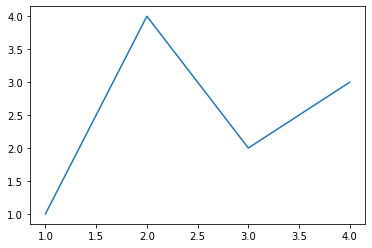

In [ ]:
import matplotlib.pyplot as plt
plt.plot([1, 2, 3, 4], [1, 4, 2, 3])  # Matplotlib plot.

In [ ]:
import matplotlib
# help(matplotlib.figure.Figure)
# dir(matplotlib.figure.Figure)
dir(matplotlib.axes.Axes)
# help(matplotlib.axes.Axes)

plotで使うのは `numpy.array` なので、次のように変換する必要があるかもしれない。

pandas.Dataframe の場合:  

    a = pandas.DataFrame(np.random.rand(4, 5), columns = list('abcde'))  
    a_asarray = a.values  

numpy.matrix の場合:  

    b = np.matrix([[1, 2], [3, 4]])  
    b_asarray = np.asarray(b)  

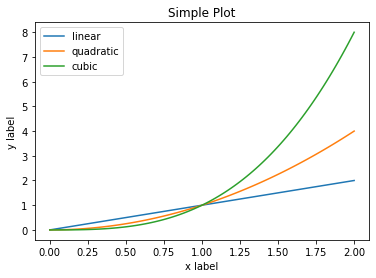

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
x = np.linspace(0, 2, 100) # 0,2の間を100に刻む
fig, ax = plt.subplots()  # figure と ax を作る
ax.plot(x, x, label='linear')  # プロットする
ax.plot(x, x**2, label='quadratic')  # y=x^2のグラフ
ax.plot(x, x**3, label='cubic')  # y=x^3のグラフ
ax.set_xlabel('x label')  # x軸のラベル
ax.set_ylabel('y label')  # y軸のラベル
ax.set_title("Simple Plot")  # グラフにタイトルをつける
ax.legend()  # レジェンドを加える

or (pyplot-style)



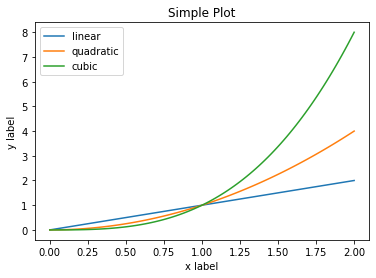

In [ ]:
# fgとaxを作らない場合の例
import matplotlib.pyplot as plt
import numpy as np
x = np.linspace(0, 2, 100)
plt.plot(x, x, label='linear')  # 明示されていない座標にプロットする
plt.plot(x, x**2, label='quadratic')  
plt.plot(x, x**3, label='cubic')
plt.xlabel('x label')
plt.ylabel('y label')
plt.title("Simple Plot")
plt.legend()
plt.show()

fig,axを作ってオブジェクトに関数を使っていくいわゆるOO型のプログラミングのメリットは、違うデータセットで同じグラフを繰り返し書く際に現れる。

そのような場合の関数の書き方の例を次に示す。


In [ ]:
def my_plotter(ax, data1, data2, param_dict):
    """
    A helper function to make a graph

    Parameters
    ----------
    ax : Axes
        The axes to draw to

    data1 : array
       The x data

    data2 : array
       The y data

    param_dict : dict
       Dictionary of kwargs to pass to ax.plot

    Returns
    -------
    out : list
        list of artists added
    """
    out = ax.plot(data1, data2, **param_dict)
    return out

この関数は次のように使う


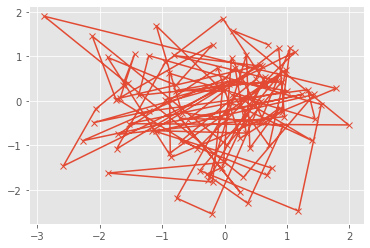

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
data1, data2, data3, data4 = np.random.randn(4, 100)
fig, ax = plt.subplots(1, 1)
my_plotter(ax, data1, data2, {'marker': 'x'})

違うデータで同じ関数を使って2枚のグラフを描くことができる。


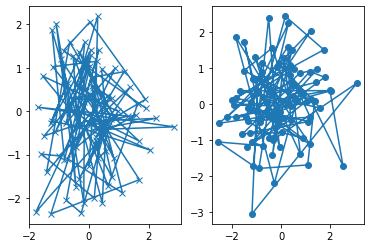

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2)
my_plotter(ax1, data1, data2, {'marker': 'x'})
my_plotter(ax2, data3, data4, {'marker': 'o'})

メモ randomについて

table | 意味
--- | ---
rand()    | 0.0以上、1.0未満の乱数を1個生成  
rand(3)   | 0.0以上、1.0未満の乱数を3個生成  
rand(2,3) | 0.0以上、1.0未満の乱数で 2x3 の行列を生成  
(b-a) * np.random.rand() + a |（[a, b): a以上、b未満）の乱数  
randn()         | 標準正規分布 (平均0, 標準偏差1)  
randn(10)       | 標準正規分布を10個生成  
randn(10,10)    | 標準正規分布による 10x10 の行列  
normal(50,10)   | 平均50、標準偏差10の正規分布  
binomial(n=100, p=0.5) | 二項分布  
poisson(lam=10)     | λ=10 のポアソン分布  
beta(a=3, b=5)      | a=3, b=5 のベータ分布  
randint(100)            |  0〜99 の整数を1個生成  
randint(30,70)          | 30〜69 の整数を1個生成  
randint(0,100,20)       |  0〜99 の整数を20個生成  
randint(0,100,(5,5))    |  0〜99 の整数で5x5の行列を生成  
random_integers(100)    | 1〜100 の整数を1個生成  
random_integers(30,70)  | 30〜70 の整数を1個生成  
random.choice(city)                 | 1個をランダム抽出       
random.choice(city,10)              | 10個をランダム抽出（重  
random.choice(city,5,replace=False) | 5個をランダム抽出（重複なし)  
random.choice(city, p=weight)       | 指定した確率で1個を抽出  
seed(100)       | 数値はなんでもいい  
numpy.random.random_sample((2,3)) | 0.0以上、1.0未満の乱数で 2x3 の行列を生成
 | np.random.random、np.random.ranf、
 | np.random.sampleはぜんぶ同じ  
numpy.random.gamma(5,1,10) | 形状母数shape, 尺度母数scale, size  
numpy.random.chisquare() | カイ二乗分布 自由度df, size  

# バックエンド backend


バックエンドとはなにか。  

グラフを出力する時、colab (jupyter) のように inline でプロットする場合だけでなく、さまざまな状況で matplotlib は使われる。 そのような様々な出力に対応する部分をバックエンドと呼ぶ。 

例えば、次のようなユースケースがある。  
- Pythonシェルからインタラクティブにmatplotlibを使用し、コマンドを入力するとプロットウィンドウがポップアップする  
- wxpythonやpygtkなどのグラフィカルユーザーインターフェイスに埋め込んで、アプリケーションを構築する
- バッチスクリプトで数値シミュレーションからポストスクリプト画像を生成する
- Webアプリケーションサーバーを実行してグラフを動的に提供する

バックエンドには2つのタイプがある。  
1. pygtk、wxpython、tkinter、qt4、macosx で使用するためのユーザーインターフェイスバックエンド。ユーザーインターフェイスバックエンドはインタラクティブバックエンド、対話型バックエンドとも呼ばれる
2. PNG、SVG、PDF、PS などの画像ファイルを作成するためのハードコピーバックエンド。非対話型バックエンドとも呼ばれる

バックエンドの設定は3通りの方法がある。
1. `matplotlibrc` ファイルで パラメーター `backend` で指定する
2. 環境変数 envvar:`MPLBACKEND` を使う
3. 関数 `matplotlib.use` を使う


# pyplot




Intro to pyplot
:mod:matplotlib.pyplot is a collection of functions that make matplotlib work like MATLAB. Each pyplot function makes some change to a figure: e.g., creates a figure, creates a plotting area in a figure, plots some lines in a plotting area, decorates the plot with labels, etc.

In :mod:matplotlib.pyplot various states are preserved across function calls, so that it keeps track of things like the current figure and plotting area, and the plotting functions are directed to the current axes (please note that "axes" here and in most places in the documentation refers to the axes part of a figure <figure_parts> and not the strict mathematical term for more than one axis).

Note
the pyplot API is generally less-flexible than the object-oriented API. Most of the function calls you see here can also be called as methods from an ``Axes`` object. We recommend browsing the tutorials and examples to see how this works.

Generating visualizations with pyplot is very quick:

# いまここ